In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split



In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import  make_scorer, fbeta_score

In [3]:
from imblearn.under_sampling import RandomUnderSampler

In [4]:
df = pd.read_csv("C:/Users/ozcan/OneDrive/Masaüstü/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

print(numerical_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [7]:
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

<Figure size 1200x1000 with 0 Axes>

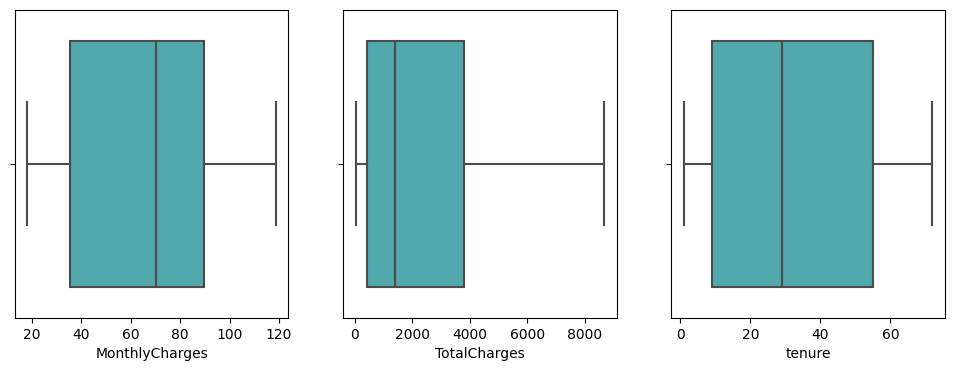

In [8]:
plt.figure(figsize=(12,10))
fig,axes = plt.subplots(ncols=3,figsize = (12,4))
sns.boxplot(data = df , x = "MonthlyCharges",ax =axes[0],color="#42b7bd")
sns.boxplot(data = df , x = "TotalCharges",ax =axes[1],color="#42b7bd")
sns.boxplot(data = df , x = "tenure",ax =axes[2],color="#42b7bd")

plt.show()




<Figure size 1200x1000 with 0 Axes>

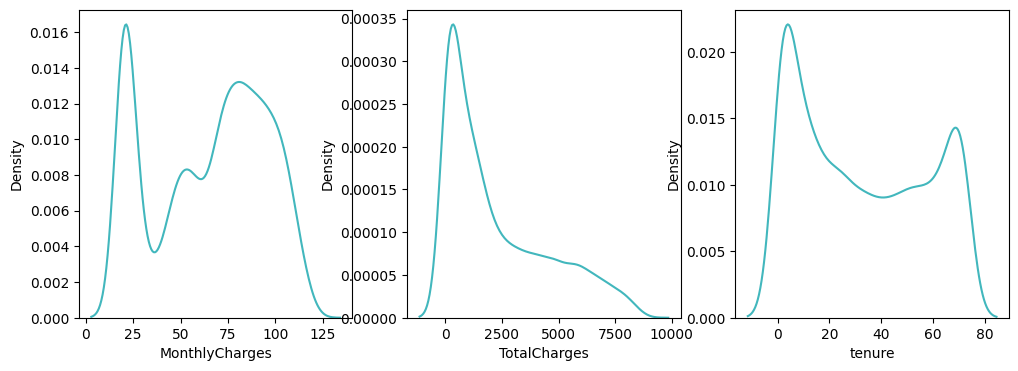

In [9]:
plt.figure(figsize=(12,10))
fig,axes = plt.subplots(ncols=3,figsize = (12,4))
sns.kdeplot(data = df , x = "MonthlyCharges",ax =axes[0],color="#42b7bd",)
sns.kdeplot(data = df , x = "TotalCharges",ax =axes[1],color="#42b7bd")
sns.kdeplot(data = df , x = "tenure",ax =axes[2],color="#42b7bd")
plt.show()




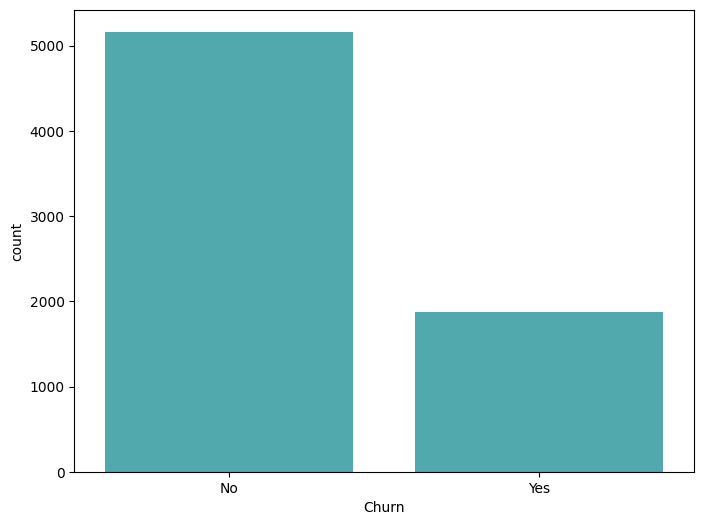

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x = df["Churn"],color="#42b7bd")
plt.show()
#looks like class imbalance

In [11]:
from sklearn.model_selection import train_test_split
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})
X = df.drop(["Churn","customerID"],axis = 1)

X= pd.get_dummies(X, drop_first= True)

y = df["Churn"]

In [12]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [13]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [14]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2785,0,50,109.65,5551.15,0,0,0,1,0,1,...,0,1,0,1,0,1,1,0,1,0
896,0,12,98.90,1120.95,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3958,1,52,106.50,5621.85,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
5193,0,9,19.90,164.60,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1270,0,62,101.15,6638.35,0,1,1,1,0,1,...,0,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,16,74.55,1170.50,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
5695,0,19,86.85,1564.40,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
1361,0,10,85.60,813.85,1,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
1547,0,31,80.55,2471.60,0,1,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0


Scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [16]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2785,-0.43296,0.723700,1.483236,1.441721,0,0,0,1,0,1,...,0,1,0,1,0,1,1,0,1,0
896,-0.43296,-0.829194,1.126921,-0.508566,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3958,2.30968,0.805431,1.378827,1.472845,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
5193,-0.43296,-0.951790,-1.491582,-0.929575,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1270,-0.43296,1.214088,1.201498,1.920335,0,1,1,1,0,1,...,0,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,-0.43296,-0.665731,0.319825,-0.486753,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
5695,-0.43296,-0.543134,0.727516,-0.313348,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
1361,-0.43296,-0.910925,0.686084,-0.643759,1,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
1547,-0.43296,-0.052747,0.518699,0.086025,0,1,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0


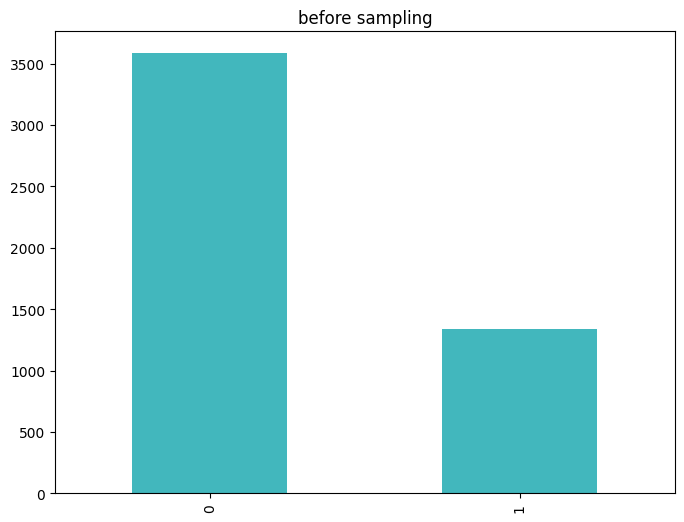

In [17]:
y_train.value_counts().plot(kind="bar",title ="before sampling",color="#42b7bd",figsize=(8,6))
plt.show()

In [18]:
from imblearn.under_sampling import RandomUnderSampler

In [19]:
rus = RandomUnderSampler(sampling_strategy="majority")

In [20]:
X_train_rus , y_train_rus = rus.fit_resample(X_train,y_train)

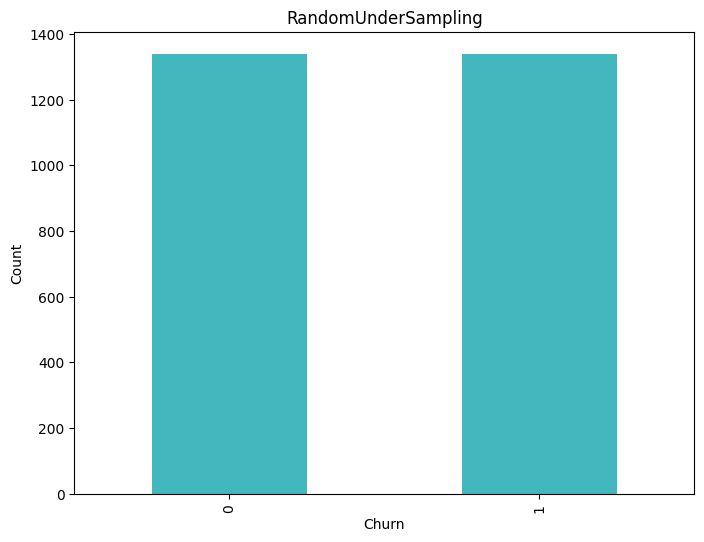

In [21]:
y_train_rus.value_counts().plot(kind="bar",title="RandomUnderSampling",color="#42b7bd",figsize=(8,6),)
plt.xlabel("Churn")
plt.ylabel("Count")

plt.show()

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

Training without sampling - without grid-search , using only the base random forest model

In [23]:
#training without sampling, without grid search
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_predicts = rf.predict(X_test)

In [24]:

print(classification_report(y_test, rf_predicts))


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1580
           1       0.61      0.49      0.54       530

    accuracy                           0.79      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



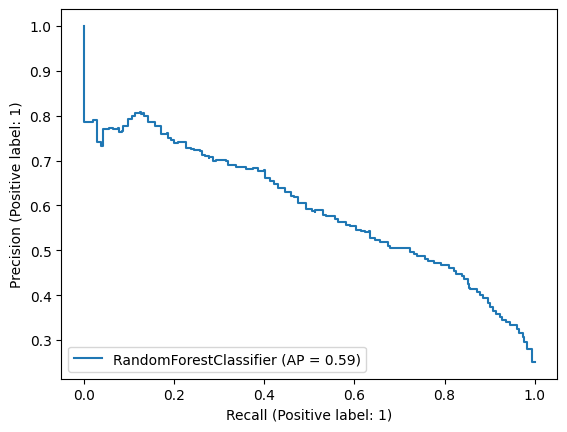

In [25]:
PrecisionRecallDisplay.from_estimator(rf,X_test,y_test)

In [26]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import average_precision_score
from imblearn.over_sampling import ADASYN

BASE MODEL SELECTION WITH UNDERSAMPLING

In [52]:
fbeta_scorer  = make_scorer(fbeta_score,beta = 2 , )


In [53]:
steps = [("under", RandomUnderSampler(sampling_strategy="all")),("model",AdaBoostClassifier())]

pipe = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
ada_score = np.mean(scores)
print('F1 Score: %.4f' % ada_score)

F1 Score: 0.7330


In [56]:
steps = [("under", RandomUnderSampler(sampling_strategy="all")),("model",RandomForestClassifier())]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
rf_score = np.mean(scores)
print('F1 Score: %.4f' % rf_score)

F1 Score: 0.7074


In [57]:
steps = [("under", RandomUnderSampler(sampling_strategy="all")),("model",DecisionTreeClassifier())]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
dt_score = np.mean(scores)
print('F1 Score: %.4f' % dt_score)

F1 Score: 0.6111


In [58]:
steps = [("under", RandomUnderSampler(sampling_strategy="all")),("model",SVC())]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
svc_score = np.mean(scores)
print('F1 Score: %.4f' % svc_score)

F1 Score: 0.7264


In [59]:
steps = [("under", RandomUnderSampler(sampling_strategy="all")),("model",LogisticRegression())]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
lr_score = np.mean(scores)
print('F1 Score: %.4f' % lr_score)

F1 Score: 0.7297


In [60]:
steps = [("under", RandomUnderSampler(sampling_strategy="all")),("model",KNeighborsClassifier())]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
knn_score = np.mean(scores)
print('F1 Score: %.4f' % knn_score)

F1 Score: 0.7018


BASE MODEL SELECTION WITH NO SAMPLING

In [ ]:
fbeta_scorer  = make_scorer(fbeta_score,beta = 2 , )

In [61]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(AdaBoostClassifier(), X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
ada_score2 = np.mean(scores)
print('F1 Score: %.4f' % ada_score2)

F1 Score: 0.5792


In [62]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(RandomForestClassifier(), X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
rf_score2 = np.mean(scores)
print('F1 Score: %.4f' % rf_score2)

F1 Score: 0.5186


In [63]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
dt_score2 = np.mean(scores)
print('F1 Score: %.4f' % dt_score2)

F1 Score: 0.4984


In [64]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(SVC(), X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
svc_score2 = np.mean(scores)
print('F1 Score: %.4f' % svc_score2)

F1 Score: 0.5268


In [65]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
lr_score2 = np.mean(scores)
print('F1 Score: %.4f' % lr_score2)

F1 Score: 0.5809


In [66]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(KNeighborsClassifier(), X_train, y_train,scoring=fbeta_scorer, cv=cv, n_jobs=-1)
knn_score2 = np.mean(scores)
print('F1 Score: %.4f' % knn_score2)

F1 Score: 0.5429


In [89]:
from sklearn.metrics import recall_score

RECALL 

In [133]:
recall_scorer = make_scorer(recall_score,pos_label = 1)


In [134]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(AdaBoostClassifier(), X_train, y_train, scoring=recall_scorer, cv=cv, n_jobs=-1)
ada_score2 = np.mean(scores)
print('F1 Score: %.4f' % ada_score2)

F1 Score: 0.5631


In [135]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(RandomForestClassifier(), X_train, y_train, scoring=recall_scorer, cv=cv, n_jobs=-1)
rf_score2 = np.mean(scores)
print('F1 Score: %.4f' % rf_score2)

F1 Score: 0.4986


In [136]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, scoring=recall_scorer, cv=cv, n_jobs=-1)
dt_score2 = np.mean(scores)
print('F1 Score: %.4f' % dt_score2)

F1 Score: 0.5041


In [137]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(SVC(), X_train, y_train, scoring=recall_scorer, cv=cv, n_jobs=-1)
svc_score2 = np.mean(scores)
print('F1 Score: %.4f' % svc_score2)

F1 Score: 0.5011


In [138]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring=recall_scorer, cv=cv, n_jobs=-1)
lr_score2 = np.mean(scores)
print('F1 Score: %.4f' % lr_score2)

F1 Score: 0.5656


In [139]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(KNeighborsClassifier(), X_train, y_train,scoring=recall_scorer, cv=cv, n_jobs=-1)
knn_score2 = np.mean(scores)
print('F1 Score: %.4f' % knn_score2)

F1 Score: 0.5382


In [140]:
np.mean([ada_score2,rf_score2,dt_score2,svc_score2,lr_score2,knn_score2])

0.5284492325340715

F1

In [141]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(AdaBoostClassifier(), X_train, y_train, scoring="f1_macro", cv=cv, n_jobs=-1)
ada_score2 = np.mean(scores)
print('F1 Score: %.4f' % ada_score2)

F1 Score: 0.7361


In [142]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(RandomForestClassifier(), X_train, y_train, scoring="f1_macro", cv=cv, n_jobs=-1)
rf_score2 = np.mean(scores)
print('F1 Score: %.4f' % rf_score2)

F1 Score: 0.7114


In [143]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, scoring="f1_macro", cv=cv, n_jobs=-1)
dt_score2 = np.mean(scores)
print('F1 Score: %.4f' % dt_score2)

F1 Score: 0.6497


In [144]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(SVC(), X_train, y_train, scoring="f1_macro", cv=cv, n_jobs=-1)
svc_score2 = np.mean(scores)
print('F1 Score: %.4f' % svc_score2)

F1 Score: 0.7186


In [145]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring="f1_macro", cv=cv, n_jobs=-1)
lr_score2 = np.mean(scores)
print('F1 Score: %.4f' % lr_score2)

F1 Score: 0.7361


In [146]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(KNeighborsClassifier(), X_train, y_train,scoring="f1_macro", cv=cv, n_jobs=-1)
knn_score2 = np.mean(scores)
print('F1 Score: %.4f' % knn_score2)

F1 Score: 0.6938


In [147]:
np.mean([ada_score2,rf_score2,dt_score2,svc_score2,lr_score2,knn_score2])

0.7076043743986773

BASE MODEL WITH OVERSAMPLING

In [67]:
steps = [("over", ADASYN(sampling_strategy="all")),("model",AdaBoostClassifier())]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
ada_score3 = np.mean(scores)
print('F1 Score: %.4f' % ada_score3 )

F1 Score: 0.7304


In [68]:
steps = [("over", ADASYN(sampling_strategy="all")),("model",RandomForestClassifier())]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
rf_score3 = np.mean(scores)
print('F1 Score: %.4f' % rf_score3 )

F1 Score: 0.6371


In [69]:
steps = [("over", ADASYN(sampling_strategy="all")),("model",DecisionTreeClassifier(class_weight="balanced"))]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
dt_score3 = np.mean(scores)
print('F1 Score: %.4f' % dt_score3 )

F1 Score: 0.5588


In [70]:
steps = [("over", ADASYN(sampling_strategy="all")),("model",SVC())]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
svc_score3 = np.mean(scores)
print('F1 Score: %.4f' % svc_score3 )

F1 Score: 0.7150


In [74]:
steps = [("over", ADASYN(sampling_strategy="all")),("model",LogisticRegression())]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
lr_score3 = np.mean(scores)
print('F1 Score: %.4f' % lr_score3 )

F1 Score: 0.6925


In [75]:
steps = [("over", ADASYN(sampling_strategy="all")),("model",KNeighborsClassifier())]

pipe = Pipeline(steps=steps)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring=fbeta_scorer, cv=cv, n_jobs=-1)
knn_score3 = np.mean(scores)
print('F1 Score: %.4f' % knn_score3 )

F1 Score: 0.6724


In [76]:
models_df = pd.DataFrame(data = [[ada_score2,rf_score2,dt_score2,svc_score2,lr_score2,knn_score2],[ada_score,rf_score,dt_score,svc_score,lr_score,knn_score],[ada_score3,rf_score3,dt_score3,svc_score3,lr_score3,knn_score3]],columns = ["AdaBoost","RandomForest","DecisionTree","SVC","LogisticReg","KNN"],index=["NoSampling","UnderSampling","OverSampling"])
models_df  = models_df.transpose()
models_df

,NoSampling,UnderSampling,OverSampling
AdaBoost,0.579160,0.733026,0.730371
RandomForest,0.518601,0.707389,0.637141
DecisionTree,0.498418,0.611104,0.558775
SVC,0.526841,0.726403,0.714985
LogisticReg,0.580937,0.729680,0.692500
KNN,0.542853,0.701845,0.672406


In [77]:
new_row = {"NoSampling":models_df["NoSampling"].mean(),"UnderSampling":models_df["UnderSampling"].mean(),"OverSampling":models_df["OverSampling"].mean()}

models_df = models_df.append(pd.Series(new_row,name="MeanF1Scores"))

C:\Users\ozcan\AppData\Local\Temp\ipykernel_22448\920897769.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append(pd.Series(new_row,name="MeanF1Scores"))


In [78]:
models_df

,NoSampling,UnderSampling,OverSampling
AdaBoost,0.579160,0.733026,0.730371
RandomForest,0.518601,0.707389,0.637141
DecisionTree,0.498418,0.611104,0.558775
SVC,0.526841,0.726403,0.714985
LogisticReg,0.580937,0.729680,0.692500
KNN,0.542853,0.701845,0.672406
MeanF1Scores,0.541135,0.701575,0.667696


In [79]:
models_df["NoSampling"].sort_values(ascending=False)

LogisticReg     0.580937
AdaBoost        0.579160
KNN             0.542853
MeanF1Scores    0.541135
SVC             0.526841
RandomForest    0.518601
DecisionTree    0.498418
Name: NoSampling, dtype: float64

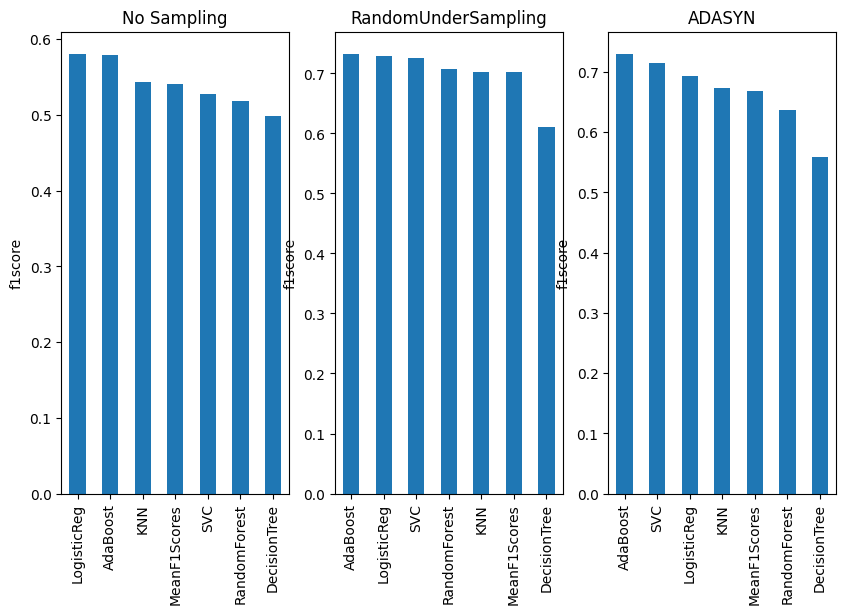

In [80]:
fig,axes = plt.subplots(ncols=3,figsize = (12,4))
models_df["NoSampling"].sort_values(ascending=False).plot(kind="bar",ax=axes[0],title ="No Sampling",ylabel="f1score",figsize=(12,10))
models_df["UnderSampling"].sort_values(ascending=False).plot(kind="bar",ax=axes[1],title ="RandomUnderSampling",ylabel="f1score",figsize=(10,6))
models_df["OverSampling"].sort_values(ascending=False).plot(kind="bar",ax=axes[2],title="ADASYN",ylabel="f1score",figsize=(10,6))
plt.show()

In [81]:

# Define the pipeline
pipeline = Pipeline([
    ('sampler', RandomUnderSampler()),
    ('ada', AdaBoostClassifier(estimator=DecisionTreeClassifier()))
])

# Define the parameter grid for grid search
param_grid = {"sampler__sampling_strategy":["majority"],
    'ada__n_estimators': [50, 100, 200],
    'ada__estimator__max_depth': [1, 2, 3],
    'ada__estimator__max_depth': [1,2,3,4,5],
    "ada__estimator__criterion":["gini","entropy"],
    "ada__estimator__max_features": ["auto","sqrt","log2"],
    'ada__estimator__max_leaf_nodes':[3,4,5,6,7]  

}

scorer = make_scorer(f1_score, average='macro')
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring=fbeta_scorer, cv=5)
grid_search.fit(X_train, y_train)
# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'ada__estimator__criterion': 'gini', 'ada__estimator__max_depth': 1, 'ada__estimator__max_features': 'sqrt', 'ada__estimator__max_leaf_nodes': 4, 'ada__n_estimators': 100, 'sampler__sampling_strategy': 'majority'}
Best score:  0.7371885329612027


In [82]:
preds = grid_search.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1580
           1       0.50      0.79      0.61       530

    accuracy                           0.75      2110
   macro avg       0.70      0.76      0.71      2110
weighted avg       0.81      0.75      0.76      2110



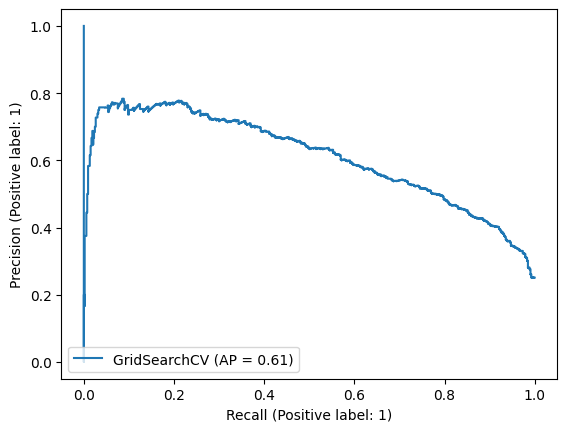

In [83]:
PrecisionRecallDisplay.from_estimator(grid_search,X_test,y_test)
plt.show()

In [64]:
#training with undersampling,grid_search
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10}]
              }

grid_search = GridSearchCV(rf,param_grid=parameters,scoring ="f1")
rf_grid_model_rus = grid_search.fit(X_train_rus,y_train_rus)

KeyboardInterrupt: 

In [23]:
rf_grid_model_rus.best_params_

{'class_weight': None,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [24]:
final_model = RandomForestClassifier(class_weight=None,max_depth =5, min_samples_split=2,n_estimators=100)
final_model.fit(X_train_rus,y_train_rus)

RandomForestClassifier(max_depth=5)

In [25]:
rf_predicts_rus = final_model.predict(X_test)

In [26]:

print(classification_report(y_test, rf_predicts_rus))


              precision    recall  f1-score   support

          No       0.93      0.70      0.80       557
         Yes       0.41      0.79      0.54       147

    accuracy                           0.72       704
   macro avg       0.67      0.74      0.67       704
weighted avg       0.82      0.72      0.74       704



In [27]:
print(f1_score(y_test,rf_predicts_rus,pos_label="Yes"))

0.5370370370370371


In [28]:
from sklearn.metrics import recall_score

In [29]:
print(recall_score(y_test,rf_predicts_rus,pos_label ="Yes"))

0.7891156462585034


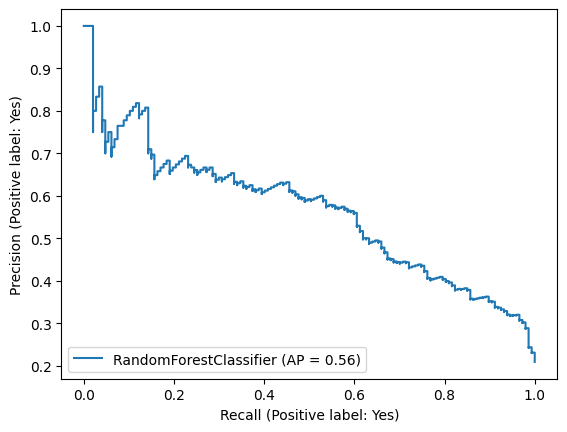

In [30]:
PrecisionRecallDisplay.from_estimator(final_model,X_test,y_test)

In [31]:
y_pred1_proba = final_model.predict_proba(X_test)[:,1]

In [32]:
y_test_mapped = y_test.map({"No":0,"Yes":1})

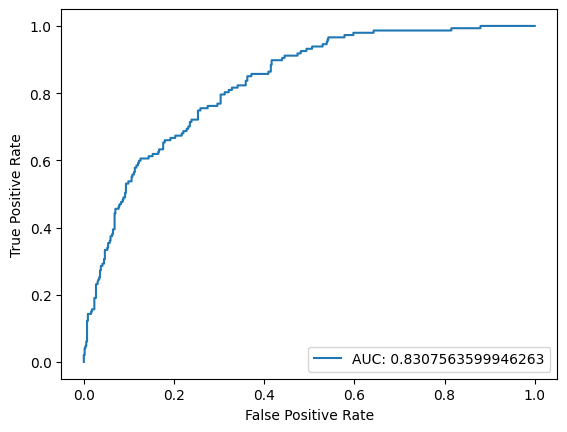

In [33]:
fpr,tpr,_ = roc_curve(y_test_mapped,y_pred1_proba)
auc = roc_auc_score(y_test, y_pred1_proba)
plt.plot(fpr,tpr,label ="AUC: "+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [34]:

# Define parameter grid for SVM
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create SVM model
svm = SVC()

# Create grid search object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit grid search object to training data
grid_search.fit(X_train_rus, y_train_rus) 

# Print best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.7627708677895163


In [35]:
svm_predicts_rus = grid_search.predict(X_test)

In [36]:

print(classification_report(y_test, svm_predicts_rus))


              precision    recall  f1-score   support

          No       0.90      0.76      0.83       557
         Yes       0.43      0.68      0.53       147

    accuracy                           0.75       704
   macro avg       0.67      0.72      0.68       704
weighted avg       0.80      0.75      0.76       704



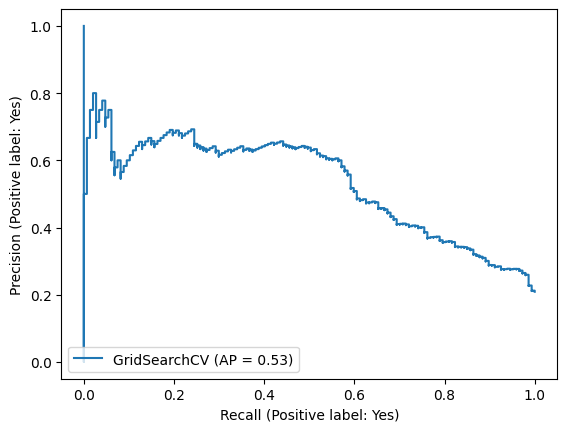

In [37]:
PrecisionRecallDisplay.from_estimator(grid_search,X_test,y_test)

In [20]:
from imblearn.over_sampling import ADASYN

In [21]:
ada =  ADASYN(sampling_strategy = "all")
X_train_syn , y_train_syn = ada.fit_resample(X_train,y_train)

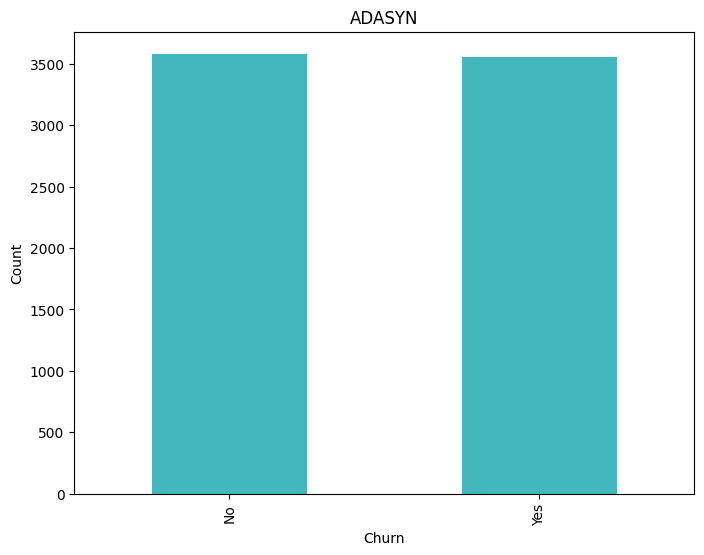

In [24]:
y_train_syn.value_counts().plot(kind="bar",title="ADASYN",figsize=(8,6),color="#42b7bd")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

Grid Search and Oversampling

In [41]:
#training with oversampling
rf = RandomForestClassifier()
parameters = {"n_estimators":[64,100,128,200],
              "max_features": [3,4,5,6],
              "bootstrap" :[True,False]                  
              }

grid_search = GridSearchCV(rf,param_grid=parameters,)
rf_grid_model_syn = grid_search.fit(X_train_syn,y_train_syn)

In [42]:
rf_grid_model_syn.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 200}

In [43]:
final_model_syn = RandomForestClassifier(max_features=3,n_estimators=200,bootstrap = False)

final_model_syn.fit(X_train_syn,y_train_syn)

RandomForestClassifier(bootstrap=False, max_features=3, n_estimators=200)

In [44]:
predicts = final_model_syn.predict(X_test)

In [45]:
print(classification_report(y_test, predicts))


              precision    recall  f1-score   support

          No       0.86      0.82      0.84       557
         Yes       0.43      0.51      0.47       147

    accuracy                           0.76       704
   macro avg       0.65      0.67      0.66       704
weighted avg       0.77      0.76      0.77       704



In [46]:
def model_metrics(preds,model,X_test,y_test):
    return classification_report(y_test,preds)
    return PrecisionRecallDisplay.from_estimator(model,X_test,y_test)

In [47]:
from sklearn.metrics import PrecisionRecallDisplay

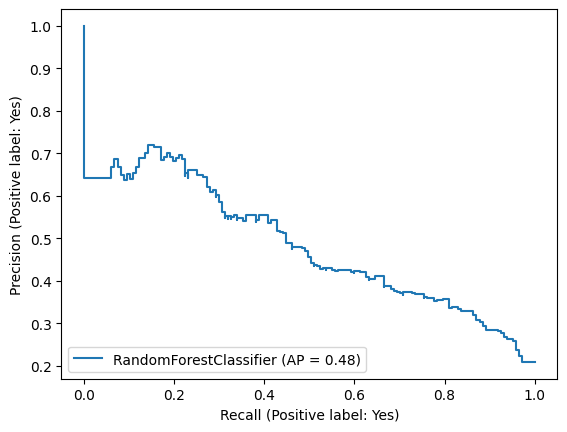

In [48]:
PrecisionRecallDisplay.from_estimator(final_model_syn,X_test,y_test)

In [49]:
f1_score(y_test,predicts,pos_label="Yes")

0.46875

In [50]:
y_pred_proba = final_model_syn.predict_proba(X_test)[:,1]
y_pred_proba[:5]

array([0.745, 0.07 , 0.45 , 0.79 , 0.05 ])

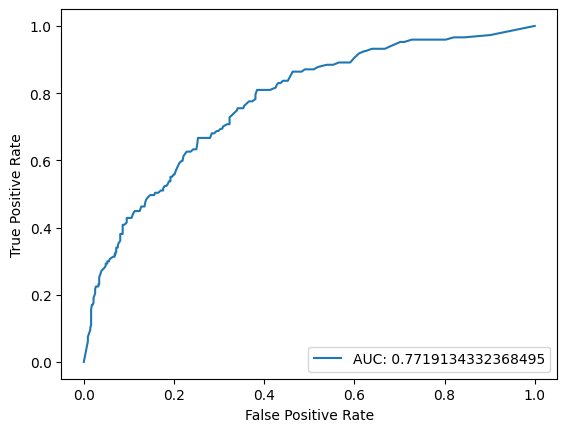

In [51]:
fpr,tpr,_ = roc_curve(y_test_mapped,y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label ="AUC: "+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [15]:
from sklearn.metrics import make_scorer
from sklearn.metrics import average_precision_score

ADABOOST


In [30]:

# Define the base estimator
estimator = DecisionTreeClassifier()

# Define the Adaboost classifier with the base estimator
ada = AdaBoostClassifier(estimator=estimator)

# Define the parameter grid to search over
param_grid = {
    'estimator__max_depth': [1,2,3,4,5],
    "estimator__criterion":["gini","entropy"],
    "estimator__max_features": ["auto","sqrt","log2"],
    'n_estimators': [10, 50, 250],
    'estimator__max_leaf_nodes':[3,4,5,6,7]  
}

#f1_scorer = make_scorer(f1_score, pos_label="Yes")

# Perform grid search with cross-validation and F1 score as the scoring metric
grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5,n_jobs=-1
                           )
grid_search.fit(X_train, y_train)

# Print the best parameters and F1 score
print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Best parameters:  {'estimator__criterion': 'entropy', 'estimator__max_depth': 1, 'estimator__max_features': 'sqrt', 'estimator__max_leaf_nodes': 6, 'n_estimators': 50}
Best F1 score:  0.8023166604762494


In [74]:
ada_pred = grid_search.predict(X_test)

In [42]:
ada_base_model = AdaBoostClassifier(estimator = DecisionTreeClassifier(criterion="entropy",max_depth=1,max_leaf_nodes=6,max_features="sqrt",),n_estimators=50)

ada_base_model.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=1,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=6))

In [43]:
ada_pred = ada_base_model.predict(X_test)

In [44]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1580
         Yes       0.64      0.56      0.60       530

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.81      2110



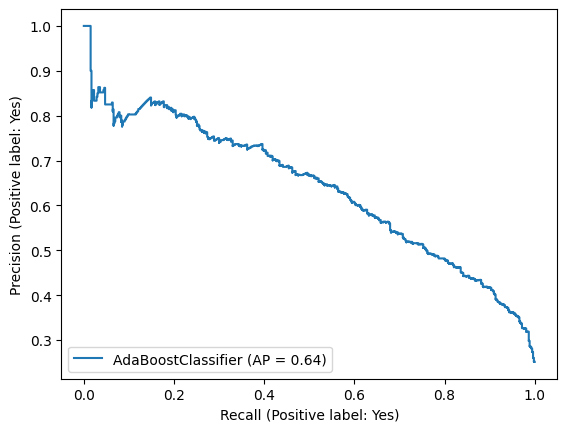

In [45]:
PrecisionRecallDisplay.from_estimator(ada_base_model,X_test,y_test)

In [68]:

# Define the base estimator
estimator = DecisionTreeClassifier()

# Define the Adaboost classifier with the base estimator
ada = AdaBoostClassifier(estimator=estimator)

# Define the parameter grid to search over
param_grid = {
    'estimator__max_depth': [1,2,3,4,5],
    "estimator__criterion":["gini","entropy"],
    "estimator__max_features": ["auto","sqrt","log2"],
    'n_estimators': [10, 50, 250],
    'estimator__max_leaf_nodes':[3,4,5,6,7] 
}

#f1_scorer = make_scorer(f1_score, pos_label="Yes")

# Perform grid search with cross-validation and F1 score as the scoring metric
grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5)
grid_search.fit(X_train_rus, y_train_rus)

# Print the best parameters and F1 score
print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

In [62]:
ada_model_final = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=1,criterion="gini",max_features="auto",max_leaf_nodes=7,class_weight="balanced"),n_estimators=50)

ada_model_final.fit(X_train_rus,y_train_rus)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1,
                                                    max_features='auto',
                                                    max_leaf_nodes=7))

In [63]:
ada_pred_rus = ada_model_final.predict(X_test)

In [64]:
print(classification_report(y_test,ada_pred_rus))

              precision    recall  f1-score   support

          No       0.90      0.71      0.80      1580
         Yes       0.48      0.77      0.59       530

    accuracy                           0.73      2110
   macro avg       0.69      0.74      0.69      2110
weighted avg       0.80      0.73      0.75      2110



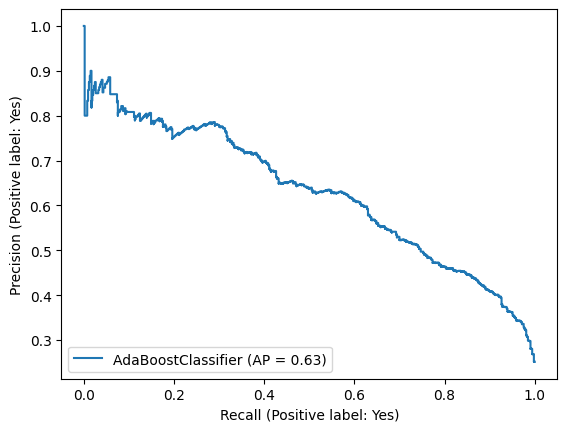

In [65]:
PrecisionRecallDisplay.from_estimator(ada_model_final,X_test,y_test)